In [2]:
#Name-Vipul Anand
#Batch=DS2312
#Project-BANK MARKETING

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [32]:
#The traing dataset
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')

In [16]:
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [17]:
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [33]:
#First of all let us delete the ID column which is unique in and has nothing to do with the label
data.drop(columns='ID',inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [19]:
#The shape of the data
data.shape

(31647, 17)

In [20]:
#The nulls in the data
data.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [10]:
#It is great that the data has no nulls associated with it

In [21]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [22]:
#Now let us check the data type of the columns
data.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [34]:
#At first we need to encode the categorical columns
#So we can see that all the columns with dtype as object are actually categorical so we will move with this
categorical_columns=[]
continous_columns=[]
for i in data.columns:
    if data[i].dtype=='object':
        categorical_columns.append(i)
    else:
        continous_columns.append(i)
continous_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [35]:
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

In [36]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
for i in categorical_columns:
    encoded=lab_enc.fit_transform(data[i])
    data[i]=encoded
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


In [16]:
#So now out data is encoded well
#let us check the value counts of this column:
for i in data.columns:
    print(data[i].value_counts())

age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64
job
1     6842
4     6639
9     5307
0     3631
7     2903
5     1574
6     1123
2     1008
10     905
3      874
8      635
11     206
Name: count, dtype: int64
marital
1    19095
2     8922
0     3630
Name: count, dtype: int64
education
1    16224
2     9301
0     4808
3     1314
Name: count, dtype: int64
default
0    31062
1      585
Name: count, dtype: int64
balance
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: count, Length: 6326, dtype: int64
housing
1    17584
0    14063
Name: count, dtype: int64
loan
0    26516
1     5131
Name: count, dtype: int64
contact
0    20423
2     9177
1     2047
Name: count, dtype: int64
day
20    1909
18    1612
21    1445
5     1373
6     1348
17    1344
14    1283
8 

In [17]:
#Let us check the description of each column
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


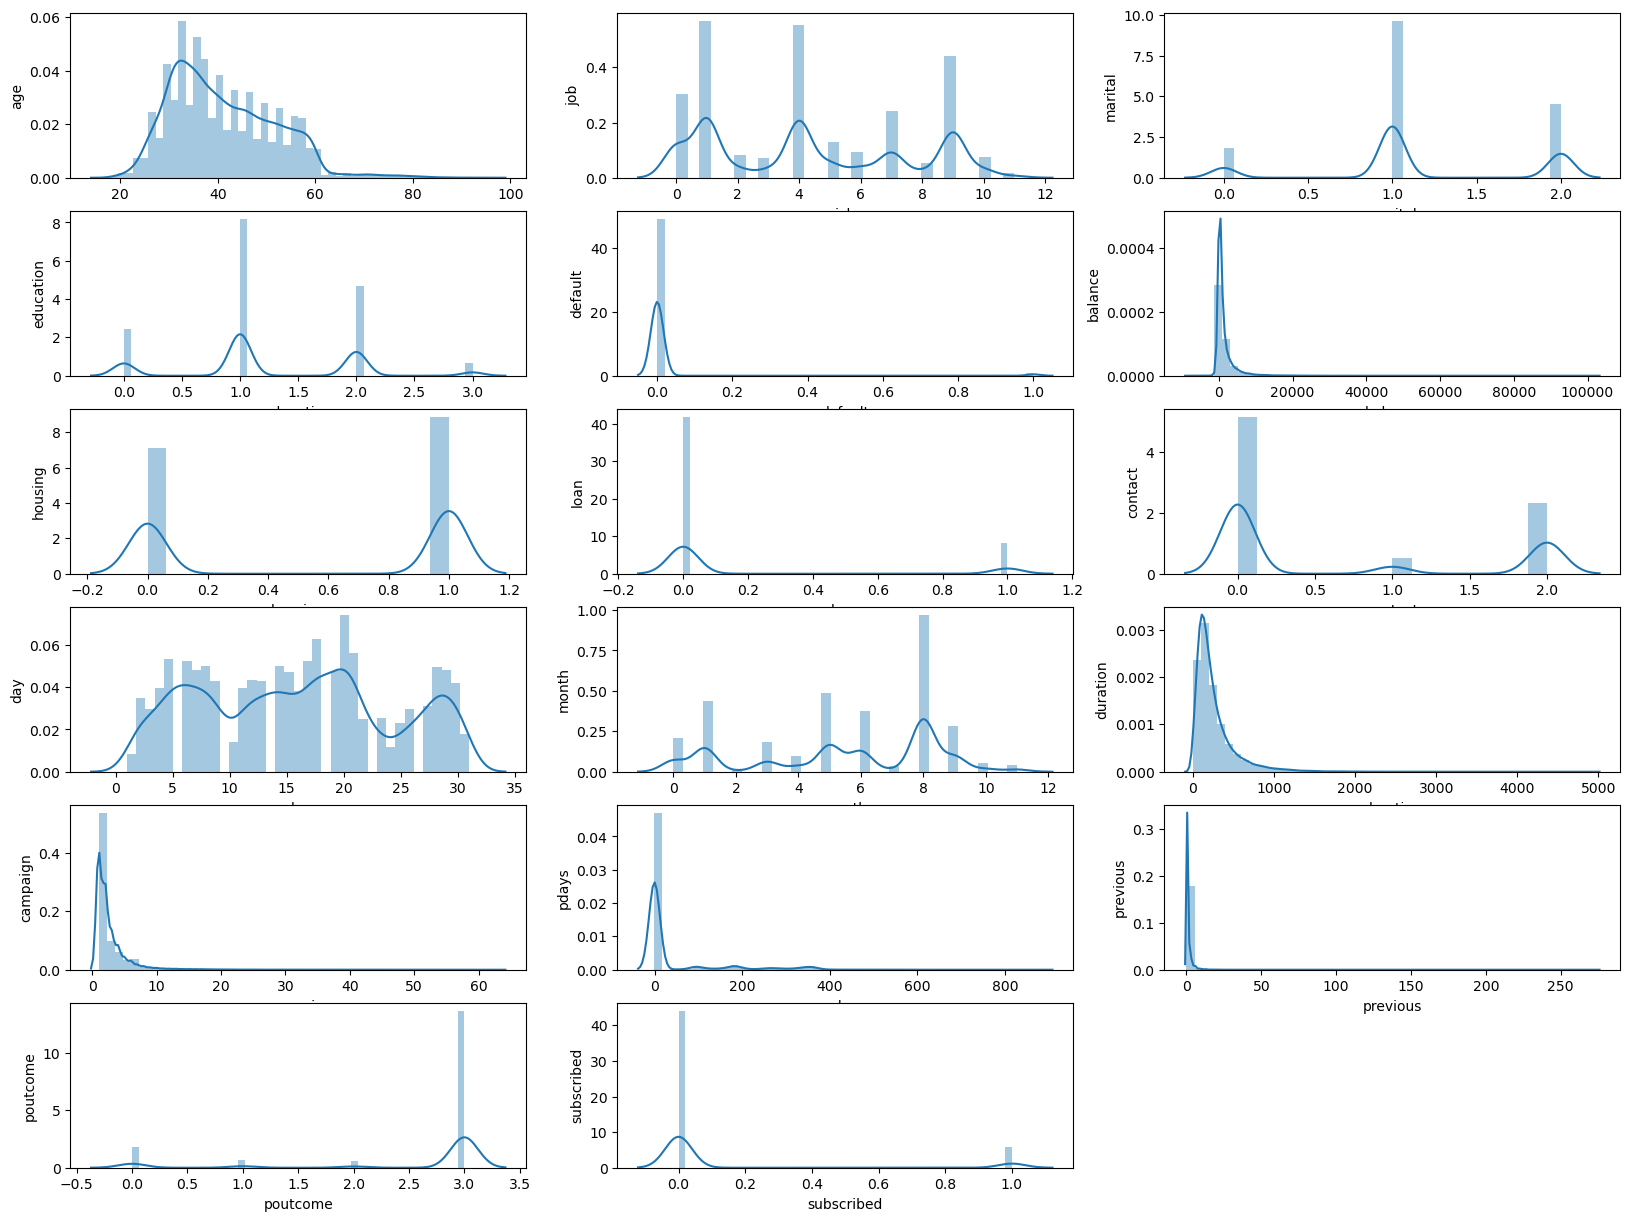

In [18]:
#Let us visualize the data properly than we can conclude the outliers
plt.figure(figsize=(20,15))
plotnumber=1
for columns in data:
    plt.subplot(6,3,plotnumber)
    sns.distplot(data[columns])
    plt.ylabel(columns)
    plotnumber=plotnumber+1
plt.show()

In [37]:
continous_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
#now let us check the box plot from there we will know better that what is happening and how much outliers are there
#Let us visualize the data properly than we can conclude the outliers
plt.figure(figsize=(20,15))
plotnumber=1
for columns in data:
    plt.subplot(6,3,plotnumber)
    sns.boxplot(data[columns])
    plt.ylabel(columns)
    plotnumber=plotnumber+1
plt.show()

In [ ]:
continous_columns

In [ ]:
#So from here we can clealy see that the pdays has so much outliers so it is better to delete this
data.drop(columns='pdays',inplace=True)

In [ ]:
#And we will use boxplot and z score to check which gives bettwe performance
#And we only care about the continous column as far as the outliers removing is concerned

In [28]:
#Boxplot
databox=data
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
for i in continous_columns:
    data.reset_index(drop=True)
    index=np.where(databox>(q3[i]+(1.5)*iqr[i]))[0]
    databox.drop(index=index,inplace=True)
    databox.reset_index(drop=True)
    index=np.where(databox<(q1[i]-(1.5)*iqr[i]))[0]
    databox.drop(index=index,inplace=True)
    databox.reset_index(drop=True)
databox

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
30,31,4,2,2,0,-205,1,0,2,3,6,56,12,-1,0,3,0
31,39,4,2,2,0,0,1,0,0,6,3,13,8,9,2,1,0
63,39,11,2,3,0,0,0,0,1,28,4,28,1,-1,0,3,0
100,30,9,2,2,0,0,1,0,2,28,8,58,1,-1,0,3,0
108,34,4,1,2,0,-123,1,0,0,14,5,64,3,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31498,51,0,1,1,0,0,0,0,1,29,5,27,2,-1,0,3,0
31564,30,9,2,2,0,-266,0,1,0,25,1,66,4,-1,0,3,0
31586,40,4,1,2,0,16,0,1,0,9,3,47,4,-1,0,3,0
31599,39,1,1,1,1,-345,1,0,2,7,8,69,1,-1,0,3,0


In [38]:
#so now let us this using the z score see it which is better
from scipy.stats import zscore as Zscore
zscore=np.abs(Zscore(data[continous_columns]))
zscore

,age,balance,day,duration,campaign,pdays,previous
0,1.415793,0.187933,0.379579,0.832754,0.245906,0.408555,0.237059
1,0.937156,0.449397,0.499526,0.649957,0.245906,0.408555,0.237059
2,1.313627,0.156159,0.259631,0.070449,0.567059,0.408555,0.237059
3,1.509911,0.635055,0.739422,2.368149,0.567059,0.447299,1.001336
4,0.937156,0.411091,1.419637,0.474054,0.567059,0.408555,0.237059
...,...,...,...,...,...,...,...
31642,1.125392,0.450388,0.460055,0.552724,0.245906,0.408555,0.237059
31643,1.133439,0.324903,1.299690,0.699635,0.245906,0.408555,0.237059
31644,0.843038,0.347358,1.059794,0.859979,0.075247,0.408555,0.237059
31645,1.509911,0.376088,0.100212,0.918319,1.359859,2.994723,4.716521


In [39]:
#let us see the index
index=np.where(zscore>3)
index[0]

array([   21,    26,    36, ..., 31622, 31645, 31646], dtype=int64)

In [40]:
len(index[0])

3696

In [41]:
#SO z score is actually performing better in this case
# so we will proceed with this zscore and we will also not loose more than 10% of the data
data.drop(index=index[0],inplace=True)
data.reset_index(drop=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4,2,1,0,2968,0,0,2,20,6,30,4,-1,0,3,0
31641,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,0,3,0
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1


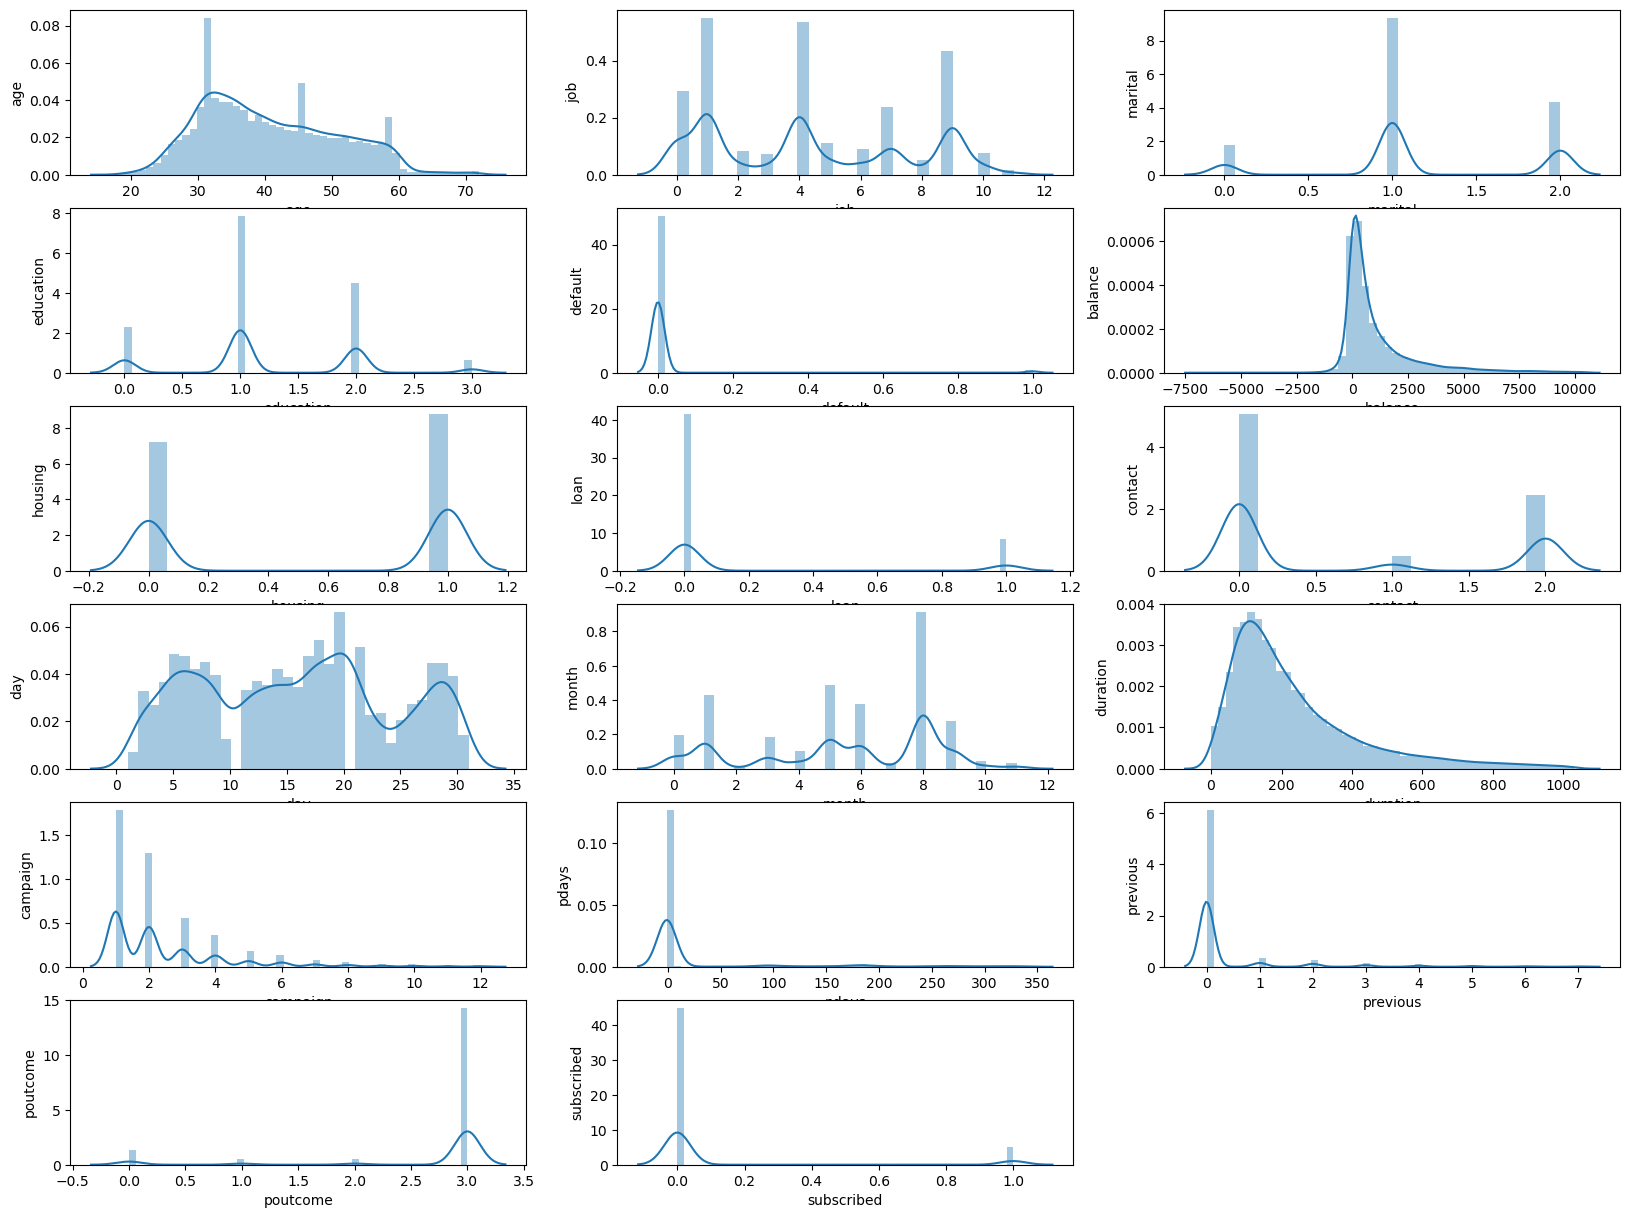

In [42]:
#Now our data is clean 
#let us plot the boxplot once again to see the distribution
plt.figure(figsize=(20,15))
plotnumber=1
for columns in data:
    plt.subplot(6,3,plotnumber)
    sns.distplot(data[columns])
    plt.ylabel(columns)
    plotnumber=plotnumber+1
plt.show()

In [43]:
#The p days columns
data['pdays'].value_counts()
#we should delete this p days column as it the days can not be in -1 and it can effect the data also
# And it has so much of -1 that deleting this will be a better idea

pdays
-1      24197
 182       99
 92        82
 183       75
 91        67
        ...  
 37         1
 18         1
 42         1
 48         1
 22         1
Name: count, Length: 331, dtype: int64

In [44]:
data.drop(columns='pdays',inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4,2,1,0,2968,0,0,2,20,6,30,4,0,3,0
31641,37,9,2,2,0,1309,0,0,2,6,6,442,2,0,3,0
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,0,3,1


In [45]:
data.reset_index(drop=True,inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,43,4,2,1,0,2968,0,0,2,20,6,30,4,0,3,0
28120,37,9,2,2,0,1309,0,0,2,6,6,442,2,0,3,0
28121,29,4,2,2,0,0,1,0,0,12,8,116,2,0,3,0
28122,53,4,0,2,0,380,0,1,0,5,6,438,2,0,3,1


In [46]:
#Now let us see the correlation matrix
corr=data.corr()
corr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
age,1.000000,-0.030552,-0.411087,-0.100363,-0.009616,0.093000,-0.155557,0.005488,0.029036,-0.009937,-0.042070,-0.026878,0.036362,0.007225,0.000751,-0.007172
job,-0.030552,1.000000,0.067076,0.169526,-0.007400,0.024371,-0.122764,-0.038629,-0.084375,0.020514,-0.088359,-0.003064,0.004785,0.012878,-0.011441,0.036743
marital,-0.411087,0.067076,1.000000,0.109940,-0.012221,0.012026,-0.026593,-0.045159,-0.042070,-0.008386,-0.003321,0.015626,-0.023093,0.019110,-0.015021,0.056387
education,-0.100363,0.169526,0.109940,1.000000,-0.007467,0.052416,-0.096581,-0.047982,-0.121975,0.017677,-0.056416,0.002073,-0.007464,0.043542,-0.041203,0.075838
default,-0.009616,-0.007400,-0.012221,-0.007467,1.000000,-0.101070,-0.014763,0.081270,0.014592,0.007138,0.007290,0.000920,0.012556,-0.036129,0.035944,-0.014500
balance,0.093000,0.024371,0.012026,0.052416,-0.101070,1.000000,-0.055898,-0.100916,-0.039168,0.008030,0.030123,0.031060,-0.014948,0.053219,-0.059939,0.070595
housing,-0.155557,-0.122764,-0.026593,-0.096581,-0.014763,-0.055898,1.000000,0.031251,0.215776,-0.015138,0.274293,0.011627,-0.041216,0.008041,-0.049579,-0.145640
loan,0.005488,-0.038629,-0.045159,-0.047982,0.081270,-0.100916,0.031251,1.000000,-0.012620,0.011949,0.026898,-0.010563,-0.001955,-0.016997,0.001714,-0.074803
contact,0.029036,-0.084375,-0.042070,-0.121975,0.014592,-0.039168,0.215776,-0.012620,1.000000,-0.030543,0.392662,-0.024035,0.002145,-0.214404,0.248117,-0.158031
day,-0.009937,0.020514,-0.008386,0.017677,0.007138,0.008030,-0.015138,0.011949,-0.030543,1.000000,0.017204,-0.027286,0.131979,-0.049292,0.045799,-0.030122


<Axes: >

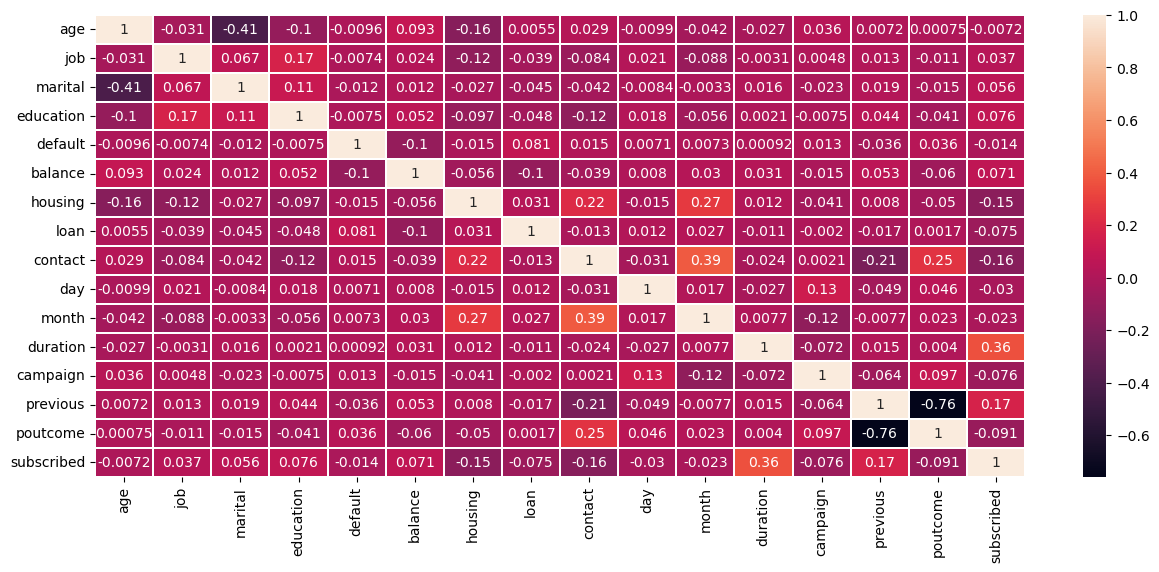

In [47]:
#The heatmap to see the coorelation
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,linewidths=0.1)

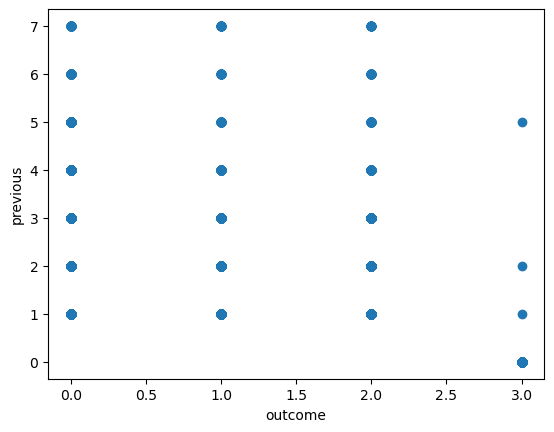

In [48]:
#So here one thing we can see is the relation between previous and poutcome
plt.scatter(x='poutcome',y='previous',data=data)
plt.xlabel('outcome')
plt.ylabel('previous')
plt.show()

In [49]:
#so we do not see much relation here so we will not delete this
corr['subscribed'].sort_values(ascending=False)

subscribed    1.000000
duration      0.355888
previous      0.174095
education     0.075838
balance       0.070595
marital       0.056387
job           0.036743
age          -0.007172
default      -0.014500
month        -0.022564
day          -0.030122
loan         -0.074803
campaign     -0.075836
poutcome     -0.091071
housing      -0.145640
contact      -0.158031
Name: subscribed, dtype: float64

In [50]:
#SO we can see that all the value are related with the label
#Now we need to divide the data in features and labels
x=data.drop(columns='subscribed')
y=data['subscribed']

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [52]:
x_scaled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,1.522811,-1.321707,-0.276906,2.376931,-0.139916,0.494277,-1.106956,-0.447423,0.359876,0.374734,1.175534,-1.008335,-0.235510,-0.330792,0.377632
1,-0.957368,2.023504,-0.276906,-0.301360,-0.139916,-0.628157,-1.106956,-0.447423,-0.735486,0.493893,-0.164394,-0.761252,-0.235510,-0.330792,0.377632
2,-1.354197,0.807064,-0.276906,-0.301360,-0.139916,-0.111721,0.903378,-0.447423,-0.735486,0.255575,-0.164394,0.022055,-0.752080,-0.330792,0.377632
3,1.622018,-0.105266,-1.927894,1.037785,-0.139916,1.281726,-1.106956,-0.447423,-0.735486,0.732212,0.170588,3.318250,-0.752080,2.536730,-0.766204
4,-0.957368,1.415284,-0.276906,-0.301360,-0.139916,-0.560694,0.903378,-0.447423,-0.735486,-1.412653,-0.834358,0.758047,-0.752080,-0.330792,0.377632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,0.233118,-0.105266,1.374081,-0.301360,-0.139916,1.096204,-1.106956,-0.447423,1.455237,0.493893,0.170588,-1.081934,0.797632,-0.330792,0.377632
28120,-0.362125,1.415284,1.374081,1.037785,-0.139916,0.131376,-1.106956,-0.447423,1.455237,-1.174334,0.170588,1.083987,-0.235510,-0.330792,0.377632
28121,-1.155782,-0.105266,1.374081,1.037785,-0.139916,-0.629901,0.903378,-0.447423,-0.735486,-0.459380,0.840552,-0.629825,-0.235510,-0.330792,0.377632
28122,1.225189,-0.105266,-1.927894,1.037785,-0.139916,-0.408904,-1.106956,2.235019,-0.735486,-1.293493,0.170588,1.062959,-0.235510,-0.330792,0.377632


In [53]:
#Now we need to check the multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
for i in range(15):
    print(variance_inflation_factor(x_scaled,i))

1.2733603335960142
1.049310300839379
1.2279688838276783
1.0653906460990947
1.0176154759632543
1.0439027225329078
1.16922198460368
1.0229226079955234
1.3233342021380783
1.0259151352787947
1.2759916579066004
1.009250684081224
1.0510828091904814
2.3750698489089053
2.4436035292609404


In [ ]:
#clearly no issue with the column 
#so we can proceed further

In [55]:
y.value_counts()

subscribed
0    25264
1     2860
Name: count, dtype: int64

In [ ]:
#here the values of the labels are not matching and oversampling is not feasible here so we will just proceed with under sampling

In [56]:
from imblearn.under_sampling import NearMiss

In [57]:
# Import necessary libraries
from imblearn.under_sampling import NearMiss

# Instantiate NearMiss with desired parameters
nm = NearMiss(version=1, sampling_strategy='auto')

# Fit and resample your data
x1_scaled,y1 = nm.fit_resample(x_scaled, y)

In [58]:
y1.value_counts()

subscribed
0    2860
1    2860
Name: count, dtype: int64

In [ ]:
#Now all the preprocessing steps are done now let us move to the model building phase

In [59]:
#now let us import the libraries to make our model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score  
from sklearn.neighbors import KNeighborsClassifier

In [60]:
#we are still using the dataset which was not undersampled if this does not gives a good accuracy than we will
#proceed with the dataset which was undersampled
#Let us preprocess the test dataset which we will be using for accuracy
x_test=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')
#We dropped the id and the pdays column in the training dataset so we will do the same here also
x_test.drop(columns=['ID','pdays'],inplace=True)
#now we will encode the categorical data
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
categorical_columns=[]
continous_columns=[]
for i in x_test:
    if x_test[i].dtype=='object':
        categorical_columns.append(i)
    else:
        continous_columns.append(i)
for i in categorical_columns:
    x_test[i]=lab_enc.fit_transform(x_test[i])
#now we need to to the zscore and eliminate the outliers as we did in the training dataset
from scipy.stats import zscore as ZSCORE
for i in continous_columns:
    Zscore=np.abs(ZSCORE(x_test[continous_columns]))
index=np.where(Zscore>3)
x_test.drop(index=index[0],inplace=True)
x_test.reset_index(drop=True)
x_test_scaled=scaler.fit_transform(x_test)
x_test_scaled

array([[-0.85316056,  0.80832619, -0.27576776, ...,  1.89130667,
        -0.38118046,  0.43491856],
       [-0.9522623 ,  0.50419257,  1.36212159, ..., -0.75904458,
        -0.38118046,  0.43491856],
       [ 1.6243828 ,  0.80832619,  1.36212159, ..., -0.22897433,
        -0.38118046,  0.43491856],
       ...,
       [-0.55585536,  0.20005896, -0.27576776, ..., -0.75904458,
        -0.38118046,  0.43491856],
       [-1.15046577, -1.32060911,  1.36212159, ..., -0.22897433,
         2.44261104, -0.57718012],
       [-1.15046577, -1.32060911, -0.27576776, ..., -0.75904458,
         0.56008337, -2.60137746]])

In [61]:
#now let us run the model on different algorithms and see which has best accuracy
rfc=RandomForestClassifier()
et=ExtraTreesClassifier()
lg=LogisticRegression()
sv=SVC()
dc=DecisionTreeClassifier()
gbdt=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
knn=KNeighborsClassifier()

In [63]:
models=[rfc,et,lg,sv,dc,gbdt,abc,bc,knn]

In [64]:
#We also had the option of using the undersampled dataset but we will be using the default dataset if it does not gives much
# accuracy than we will have to move to the undersampled dataset
#Since we do not have the labels on the test dataset so we can only predict not compare the actual values
#So the only option left for us is to evaluate the accuracy using the training dataset
#We aslo had the option of using train_test_split but we will not use that
accuracy={}
for i in models:
    i.fit(x_scaled,y)
    pred=i.predict(x_scaled)
    accuracy[i]=accuracy_score(y,pred)
accuracy

{RandomForestClassifier(): 1.0,
 ExtraTreesClassifier(): 1.0,
 LogisticRegression(): 0.9029654387711563,
 SVC(): 0.916050348456834,
 DecisionTreeClassifier(): 1.0,
 GradientBoostingClassifier(): 0.9185393258426966,
 AdaBoostClassifier(): 0.9086189731190443,
 BaggingClassifier(): 0.9912885791494809,
 KNeighborsClassifier(): 0.9250462238657374}

In [65]:
#So all the models here are having high accuracy
#So we will proceed with the model with the highest accuracy after the cross validation score
cross_val_accu={}
for i in models:
    cross_val_accu[i]=cross_val_score(i, x_scaled,y,cv=5).mean()
cross_val_accu

{RandomForestClassifier(): 0.9123169274537695,
 ExtraTreesClassifier(): 0.910041220167536,
 LogisticRegression(): 0.9028587893156315,
 SVC(): 0.9080856899004267,
 DecisionTreeClassifier(): 0.8842983404457089,
 GradientBoostingClassifier(): 0.9122813086770982,
 AdaBoostClassifier(): 0.907623429745535,
 BaggingClassifier(): 0.9079077540698594,
 KNeighborsClassifier(): 0.9028943828038566}

In [66]:
#Here gradient boost and randomforest are having high accuracy
#We will move ahead with GradientBoosting for the hyper parameter tuning
from sklearn.model_selection import GridSearchCV

In [68]:
#Here we are specifying the parameters for the gradient boost which are other than the default params
#So the point is that we can not tune the params on very large scale due to certain limitaions and with these params if 
#our model is able to give better accuracy than it is fine otherwise we will use the default params
param_grid={
    'learning_rate':[0.3,0.7],
    'n_estimators':[150],
    'min_samples_split':[4,6],
    'min_samples_leaf':[3,5],
    'max_depth':[5,7],
    'max_leaf_nodes':[4,6],
    'validation_fraction':[0.2]
}

In [69]:
grid_search = GridSearchCV(estimator=gbdt, param_grid=param_grid, cv=5, scoring='accuracy')

In [70]:
grid_search.fit(x_scaled,y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.7], 'max_depth': [5, 7],
                         'max_leaf_nodes': [4, 6], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [4, 6], 'n_estimators': [150],
                         'validation_fraction': [0.2]},
             scoring='accuracy')

In [73]:
print(grid_search.best_params_,grid_search.best_score_)

{'learning_rate': 0.3, 'max_depth': 5, 'max_leaf_nodes': 6, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 150, 'validation_fraction': 0.2} 0.9147702544649914


In [75]:
#So we can see that the grid seearc has increased the accuracy by some margin
Gbdt1=GradientBoostingClassifier(learning_rate=0.3,max_depth=5,max_leaf_nodes=6,min_samples_leaf=5,min_samples_split=4,n_estimators=150,validation_fraction=0.2)

In [104]:
#let us for the training data than we can predict the test data
Gbdt1.fit(x_scaled,y)
pred=Gbdt1.predict(x_scaled)
accuracy_score(y,pred)

0.9336865310766606

In [79]:
#now let us predict for the test dataset
predicted_values=Gbdt1.predict(x_test_scaled)
predicted_values

array([0, 0, 0, ..., 0, 1, 0])

In [80]:
len(predicted_values)

12443

In [83]:
#And since we do not have the test dataset labels we can not compare the accuracy for the test dataset

In [84]:
#let us create a dataframe for our label 

In [91]:
Predicted=[]
for i in predicted_values:
    if i==0:
        Predicted.append('NO')
    else:
        Predicted.append('YES')
Predicted_values=pd.Series(Predicted,name='Predicted values')

In [92]:
Predicted_values

0         NO
1         NO
2         NO
3         NO
4         NO
        ... 
12438     NO
12439     NO
12440     NO
12441    YES
12442     NO
Name: Predicted values, Length: 12443, dtype: object

In [93]:
Predicted_values.value_counts()

Predicted values
NO     11624
YES      819
Name: count, dtype: int64

In [94]:
y.value_counts()

subscribed
0    25264
1     2860
Name: count, dtype: int64

In [96]:
#The ratio of the predicted values are moreover also same so we can say that the model is good

In [ ]:
#Now let us do this for the undersampled data so that we can know which is better

In [97]:
#now let us run the model on different algorithms and see which has best accuracy
rfc=RandomForestClassifier()
et=ExtraTreesClassifier()
lg=LogisticRegression()
sv=SVC()
dc=DecisionTreeClassifier()
gbdt=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
knn=KNeighborsClassifier()
models=[rfc,et,lg,sv,dc,gbdt,abc,bc,knn]

In [101]:
#Now let us do this for the undersamples data which is x1_scaled and the y1
accuracy={}
for i in models:
    i.fit(x1_scaled,y1)
    pred=i.predict(x1_scaled)
    accuracy[i]=accuracy_score(y1,pred)
accuracy

{RandomForestClassifier(): 1.0,
 ExtraTreesClassifier(): 1.0,
 LogisticRegression(): 0.8017482517482517,
 SVC(): 0.8597902097902098,
 DecisionTreeClassifier(): 1.0,
 GradientBoostingClassifier(): 0.8667832167832168,
 AdaBoostClassifier(): 0.8451048951048951,
 BaggingClassifier(): 0.9884615384615385,
 KNeighborsClassifier(): 0.8445804195804196}

In [102]:
#Now let us just cross validate the scores if this will be good than only we will do the hyperparameter tuning
cross_val_accu={}
for i in models:
    cross_val_accu[i]=cross_val_score(i, x1_scaled,y1,cv=5).mean()
cross_val_accu

{RandomForestClassifier(): 0.8382867132867133,
 ExtraTreesClassifier(): 0.8323426573426573,
 LogisticRegression(): 0.7986013986013986,
 SVC(): 0.8412587412587411,
 DecisionTreeClassifier(): 0.7807692307692307,
 GradientBoostingClassifier(): 0.8486013986013987,
 AdaBoostClassifier(): 0.8407342657342658,
 BaggingClassifier(): 0.8181818181818181,
 KNeighborsClassifier(): 0.7655594405594405}

In [106]:
#Here the gradint boost is best here so we will do the tuning of this again
param_grid={
    'learning_rate':[0.3,0.7],
    'n_estimators':[150],
    'min_samples_split':[4,6],
    'min_samples_leaf':[3,5],
    'max_depth':[5,7],
    'max_leaf_nodes':[4,6],
    'validation_fraction':[0.2]
}

In [107]:
grid_search = GridSearchCV(estimator=gbdt, param_grid=param_grid, cv=5, scoring='accuracy')

In [108]:
grid_search.fit(x1_scaled,y1)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.7], 'max_depth': [5, 7],
                         'max_leaf_nodes': [4, 6], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [4, 6], 'n_estimators': [150],
                         'validation_fraction': [0.2]},
             scoring='accuracy')

In [109]:
print(grid_search.best_params_,grid_search.best_score_)

{'learning_rate': 0.3, 'max_depth': 5, 'max_leaf_nodes': 4, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 150, 'validation_fraction': 0.2} 0.859965034965035


In [111]:
#Let us make the gradient boost with these params
gbdt2=GradientBoostingClassifier(learning_rate=0.3,max_depth=5,max_leaf_nodes=4,min_samples_leaf=3,min_samples_split=4,n_estimators=150,validation_fraction=0.2)

In [113]:
gbdt2.fit(x1_scaled,y1)

GradientBoostingClassifier(learning_rate=0.3, max_depth=5, max_leaf_nodes=4,
                           min_samples_leaf=3, min_samples_split=4,
                           n_estimators=150, validation_fraction=0.2)

In [115]:
undersmapled_predited=gbdt2.predict(x_test_scaled)
undersmapled_predited

array([0, 1, 1, ..., 0, 1, 1])

In [130]:
#The accuracy the the undersampled dataset
pred=gbdt2.predict(x1_scaled)
print(accuracy_score(y1,pred))

0.8881118881118881


In [118]:
Undersampled_predicted=[]
for i in undersmapled_predited:
    if i==0:
        Undersampled_predicted.append('NO')
    else:
        Undersampled_predicted.append('YES')
len(Undersampled_predicted)

12443

In [127]:
#so let us make a dataframe to compare the values of the undersampled and the default dataset
prediction={'Default dataset':Predicted,
           'Undersampled dataset':Undersampled_predicted}
prediction=pd.DataFrame(prediction)
prediction

,Default dataset,Undersampled dataset
0,NO,NO
1,NO,YES
2,NO,YES
3,NO,YES
4,NO,NO
...,...,...
12438,NO,NO
12439,NO,YES
12440,NO,NO
12441,YES,YES


In [131]:
#Now let us also see and compare the accuracy of both the models

In [132]:
#Accuracy_default
pred=Gbdt1.predict(x_scaled)
accuracy_score(y,pred)

0.9336865310766606

In [133]:
#Accuracy score undersampled
pred=gbdt2.predict(x1_scaled)
accuracy_score(y1,pred)

0.8881118881118881

In [135]:
#So clearly the default dataset outperformed the undersamples dataset

In [105]:
#The conclusion after this project-
#The many models were performing good without cross validation but after cross validation gradient boost was the best
#We did tuning of the gradient boost after which we got 0.933 accuracy which was for the training dataset because we did not had the test labels to compare here